In [1]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [2]:
image1 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK__1514864956159109.jpg')
image2 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK_LEFT__1514864956197197.jpg')
image3 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT_LEFT__1514864956138205.jpg')
image4 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT__1514864956220368.jpg')
image5 = cv2.imread("../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT_RIGHT__1514864956493554.jpg")
image6 = cv2.imread("../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK_RIGHT__1514864936124954.jpg")

In [5]:
def plot_grid(images):
    fig, axs = plt.subplots(2, len(images)//2, figsize=(20, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.set_axis_off()
    plt.show()

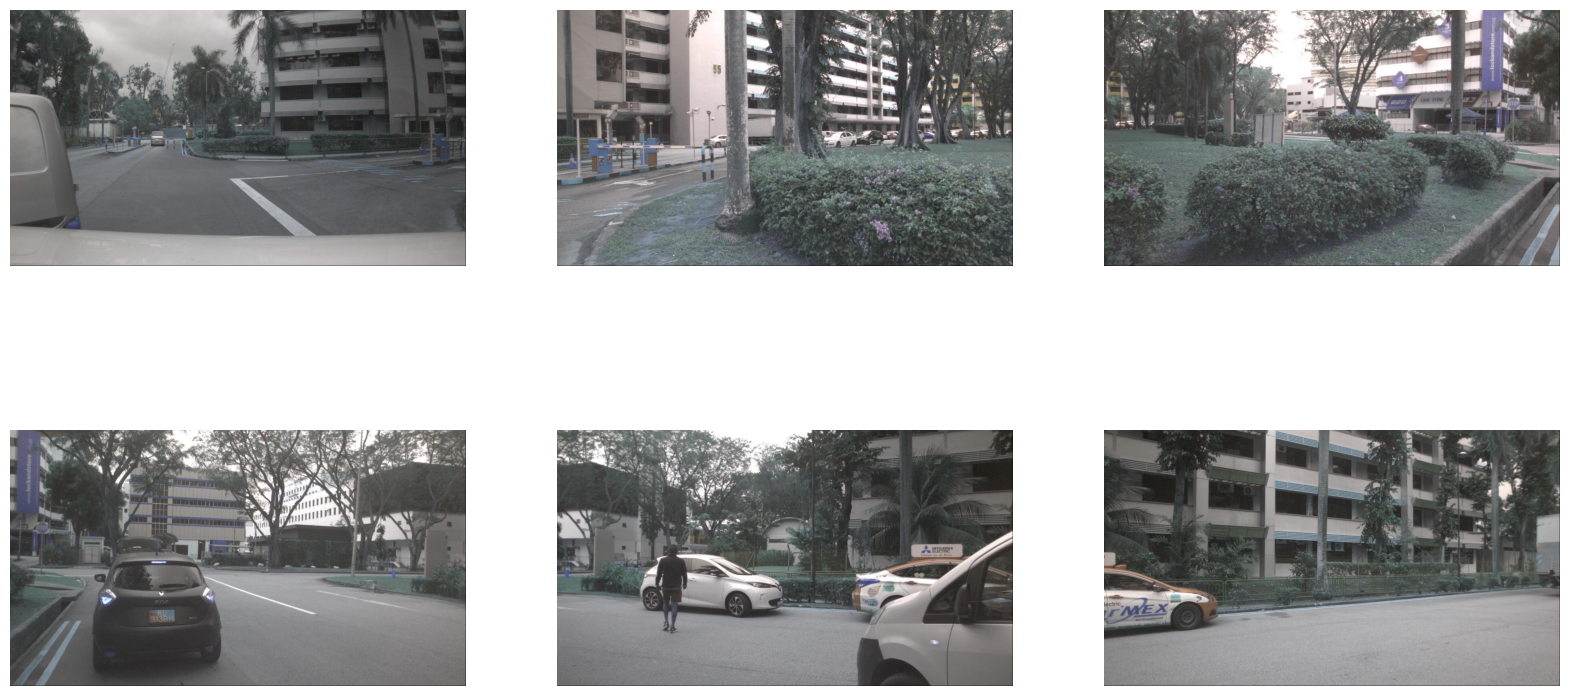

In [6]:
plot_grid([image1, image2, image3, image4, image5, image6])

In [11]:
IMAGE_H, IMAGE_W

(900, 1600)

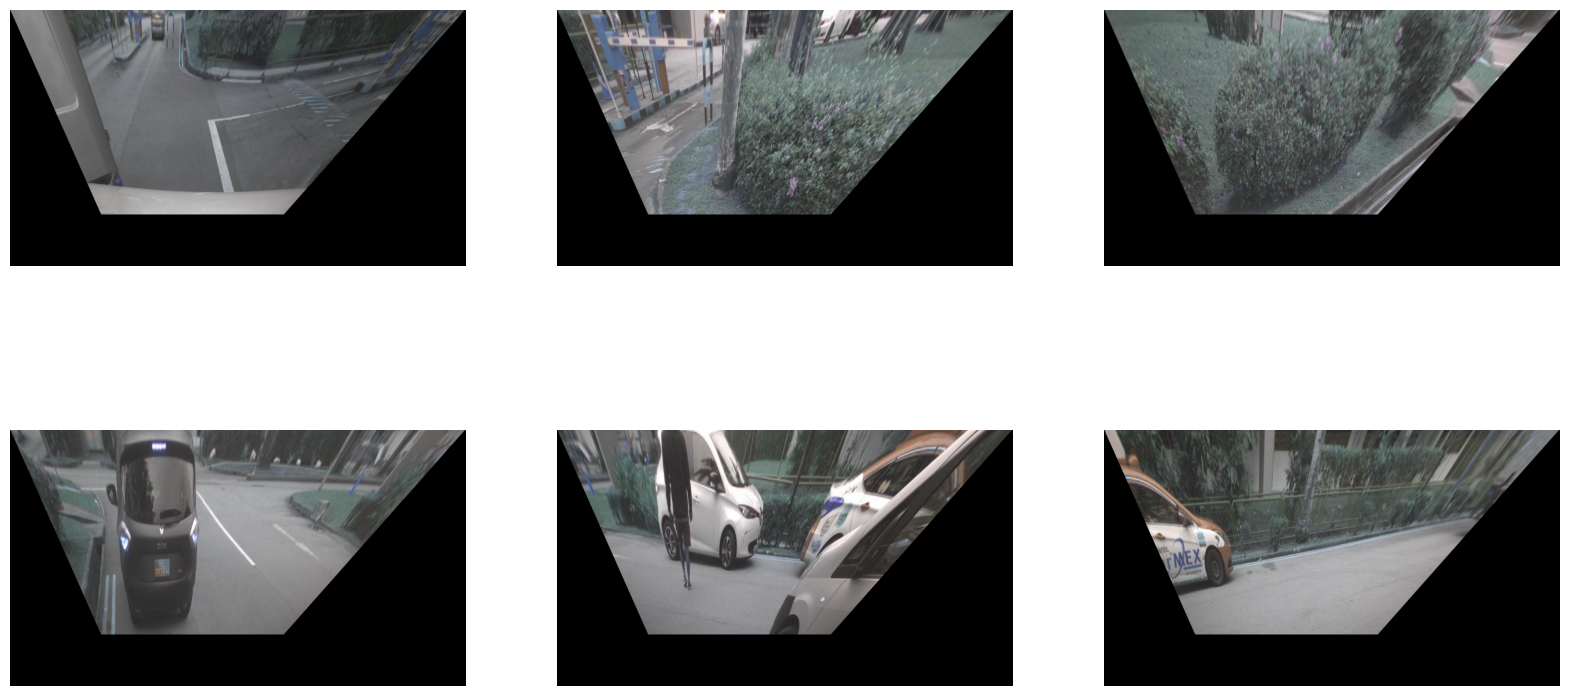

In [37]:
IMAGE_H, IMAGE_W = image1.shape[:2]

src = np.float32([[0, IMAGE_H], [IMAGE_W * 0.6, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[IMAGE_W * 0.25, IMAGE_H], [IMAGE_W * 0.4, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation


warped_imgs = []
for i, image in enumerate([image1, image2, image3, image4, image5, image6]):
    img = image # Read the test img
    img = img[int(IMAGE_H * 0.5):(int(IMAGE_H * 0.5) + IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
    warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping

    warped_imgs.append(warped_img)
    # plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
    # plt.show()

plot_grid(warped_imgs)

In [39]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

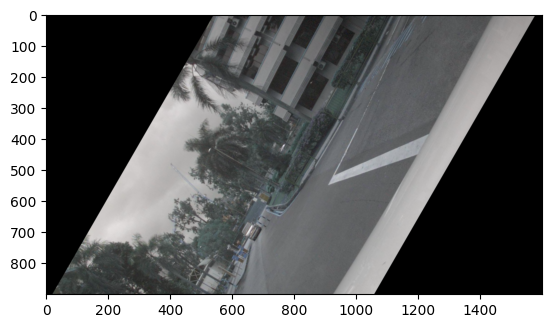

In [42]:
plt.imshow(rotate_image(image1, 60))

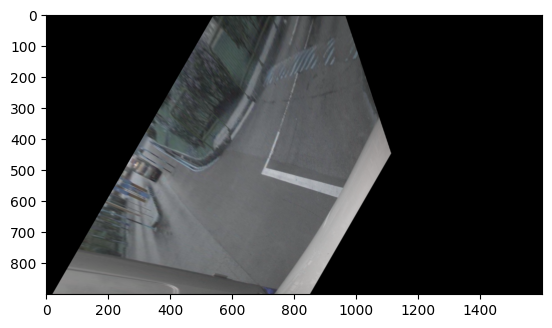

In [57]:
plt.imshow(rotate_image(warped_imgs[0], 60))

(3000, 3000, 3)
(3000, 3000, 3)
0


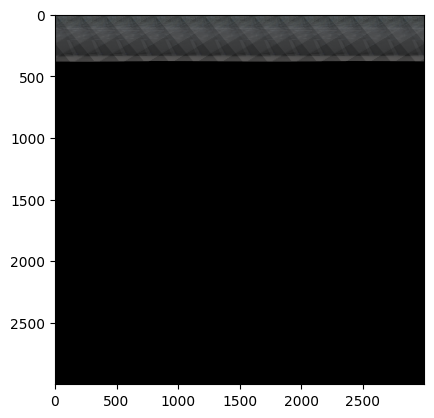

In [62]:
background_size = (3000, 3000)  # Adjust this size according to your requirements
background_color = (0, 0, 0)  # White background
background = np.full((background_size[1], background_size[0], 3), background_color, dtype=np.uint8)

# Calculate the center of the background image
center_x = background.shape[1] // 2
center_y = background.shape[0] // 2

# Define the size of the square space in the center
square_size = 100  # Adjust this size according to your requirements

# Calculate the coordinates of the square
square_left = center_x - (square_size // 2)
square_top = center_y - (square_size // 2)
square_right = center_x + (square_size // 2)
square_bottom = center_y + (square_size // 2)

rotated_images = []

# Rotate each image by multiples of 60 degrees and paste onto the background
for i in range(6):
    # Load image
    img = warped_imgs[i]  # Replace with actual image paths
    
    # Rotate image by multiples of 60 degrees
    center_x = background.shape[1] // 2
    center_y = background.shape[0] // 2

    # rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), i * 60, 1)
    # rotated_img = cv2.warpAffine(img, rotation_matrix, (background.shape[1], background.shape[0]))
    rotated_img = rotate_image(img, i * 60)

    rotated_img.resize((background.shape[1], background.shape[0], 3))
    print(rotated_img.shape)
    print(background.shape)
    print(np.sum(np.sum(background)))

    # Paste rotated image onto the background
    background = cv2.add(background, rotated_img)

    # Store rotated image for further processing
    rotated_images.append(rotated_img)
    break
# Draw the square space in the center
plt.imshow(cv2.rectangle(background, (square_left, square_top), (square_right, square_bottom), (0, 0, 0), -1))

In [70]:
import cv2
import numpy as np
import math

# Function to calculate coordinates of center of each image on the circular layout
def calculate_center_coordinates(center, radius, angle_degrees):
    angle_radians = math.radians(angle_degrees)
    center_x = int(center[0] + radius * math.cos(angle_radians))
    center_y = int(center[1] + radius * math.sin(angle_radians))
    return (center_x, center_y)

# Create a blank background image
background_size = (4000, 4000)  # Adjust this size according to your requirements
background_color = (0, 0, 0)  # White background
background = np.full((background_size[1], background_size[0], 3), background_color, dtype=np.uint8)

# Calculate the center of the background image
center_x = background.shape[1] // 2
center_y = background.shape[0] // 2
center = (center_x, center_y)

# Define the size of the square space in the center
square_size = 100  # Adjust this size according to your requirements

# Calculate the coordinates of the square
square_left = center_x - (square_size // 2)
square_top = center_y - (square_size // 2)
square_right = center_x + (square_size // 2)
square_bottom = center_y + (square_size // 2)

# Radius of the circle
radius = min(background.shape[0], background.shape[1]) // 2 - 50  # Leave some space around the circle

# Create an empty list to store rotated images
rotated_images = []

# Rotate each image by multiples of 60 degrees and paste onto the background
for i in range(6):
    # Load image
    img = warped_imgs[i]
    
    # Calculate center coordinates for this image
    angle_degrees = i * 60
    image_center = calculate_center_coordinates(center, radius, angle_degrees)
    
    # Calculate the top-left corner coordinates for pasting the image
    top_left = (image_center[0] - img.shape[1] // 2, image_center[1] - img.shape[0] // 2)

    print(top_left)
    print(img.shape)

    print(top_left[1], top_left[1] + img.shape[0], top_left[0], top_left[0] + img.shape[1])
    print(background[top_left[1]:top_left[1] + img.shape[0], top_left[0]:top_left[0] + img.shape[1]].shape)
    print(background.shape)
    
    # Paste rotated image onto the background
    background[top_left[1]:top_left[1] + img.shape[0], top_left[0]:top_left[0] + img.shape[1]] = img

    # Store rotated image for further processing
    rotated_images.append(img)

# Draw the square space in the center
plt.imshow(cv2.rectangle(background, (square_left, square_top), (square_right, square_bottom), (0, 0, 0), -1))



(3150, 1550)
(900, 1600, 3)
1550 2450 3150 4750
(900, 850, 3)
(4000, 4000, 3)


ValueError: could not broadcast input array from shape (900,1600,3) into shape (900,850,3)